In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import os

In [29]:
root_dir = os.path.dirname(os.getcwd())
display(root_dir)
data_dir = os.path.join(root_dir, 'data')
display(data_dir)
train_path = os.path.join(data_dir, 'train.xlsx')
display(train_path)

'C:\\Users\\32233\\OneDrive\\Documents\\HSE\\AI\\projects\\PSB_hack'

'C:\\Users\\32233\\OneDrive\\Documents\\HSE\\AI\\projects\\PSB_hack\\data'

'C:\\Users\\32233\\OneDrive\\Documents\\HSE\\AI\\projects\\PSB_hack\\data\\train.xlsx'

In [30]:
train_df = pd.read_excel(train_path)

In [31]:
display(train_df.head())

,Unnamed: 0,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Дата отмены,Заезд,Ночей,Выезд,Источник,Статус брони,Категория номера,Гостей,Гостиница
0,0,20230428-6634-194809261,1,25700.0,0,Внешняя система оплаты,2023-04-20 20:37:30,2023-04-20 20:39:15,2023-04-28 15:00:00,3,2023-05-01 12:00:00,Яндекс.Путешествия,Отмена,Номер «Стандарт»,2,1
1,1,20220711-6634-144460018,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,2022-06-18 14:17:02,NaT,2022-07-11 15:00:00,2,2022-07-13 12:00:00,Официальный сайт,Активный,Номер «Стандарт»,2,1
2,2,20221204-16563-171020423,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),2022-11-14 22:59:30,NaT,2022-12-04 15:00:00,2,2022-12-06 12:00:00,Официальный сайт,Активный,Номер «Студия»,2,4
3,3,20230918-7491-223512699,1,10500.0,0,Внешняя система оплаты (С предоплатой),2023-09-08 15:55:53,NaT,2023-09-18 15:00:00,1,2023-09-19 12:00:00,Bronevik.com(new),Активный,Номер «Стандарт»,1,3
4,4,20230529-6634-200121971,1,28690.0,28690,Система быстрых платежей: Эквайринг ComfortBoo...,2023-05-20 19:54:13,NaT,2023-05-29 15:00:00,2,2023-05-31 12:00:00,Официальный сайт,Активный,Номер «Люкс»,4,1


# Очистка лишних полей!
- Колонка номеров
- Номер брони
- 

In [32]:
train_df = train_df.drop(["Unnamed: 0","№ брони"], axis=1)
display(train_df)

,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Дата отмены,Заезд,Ночей,Выезд,Источник,Статус брони,Категория номера,Гостей,Гостиница
0,1,25700.0,0,Внешняя система оплаты,2023-04-20 20:37:30,2023-04-20 20:39:15,2023-04-28 15:00:00,3,2023-05-01 12:00:00,Яндекс.Путешествия,Отмена,Номер «Стандарт»,2,1
1,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,2022-06-18 14:17:02,NaT,2022-07-11 15:00:00,2,2022-07-13 12:00:00,Официальный сайт,Активный,Номер «Стандарт»,2,1
2,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),2022-11-14 22:59:30,NaT,2022-12-04 15:00:00,2,2022-12-06 12:00:00,Официальный сайт,Активный,Номер «Студия»,2,4
3,1,10500.0,0,Внешняя система оплаты (С предоплатой),2023-09-08 15:55:53,NaT,2023-09-18 15:00:00,1,2023-09-19 12:00:00,Bronevik.com(new),Активный,Номер «Стандарт»,1,3
4,1,28690.0,28690,Система быстрых платежей: Эквайринг ComfortBoo...,2023-05-20 19:54:13,NaT,2023-05-29 15:00:00,2,2023-05-31 12:00:00,Официальный сайт,Активный,Номер «Люкс»,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26169,1,18240.0,9120,Банк. карта: Банк Россия (банк. карта),2023-01-07 17:45:18,NaT,2023-03-10 15:00:00,2,2023-03-12 12:00:00,Официальный сайт,Активный,Номер «Стандарт»,2,2
26170,1,69600.0,23200,Банк. карта: Банк Россия (банк. карта),2023-06-20 17:54:17,NaT,2023-06-25 15:00:00,3,2023-06-28 12:00:00,Официальный сайт,Активный,Номер «Студия»,3,4
26171,1,55600.0,13900,Банк. карта: Банк Россия (банк. карта),2022-05-08 19:24:05,NaT,2022-06-24 15:00:00,4,2022-06-28 12:00:00,Официальный сайт,Активный,Номер «Стандарт»,2,2
26172,1,6300.0,0,Гарантия банковской картой,2022-02-19 09:55:50,2022-04-16 23:14:35,2022-04-27 15:00:00,1,2022-04-28 12:00:00,booking.com,Отмена,Номер «Стандарт»,2,3


# Let's do some statistic!

### Average costs + graphics

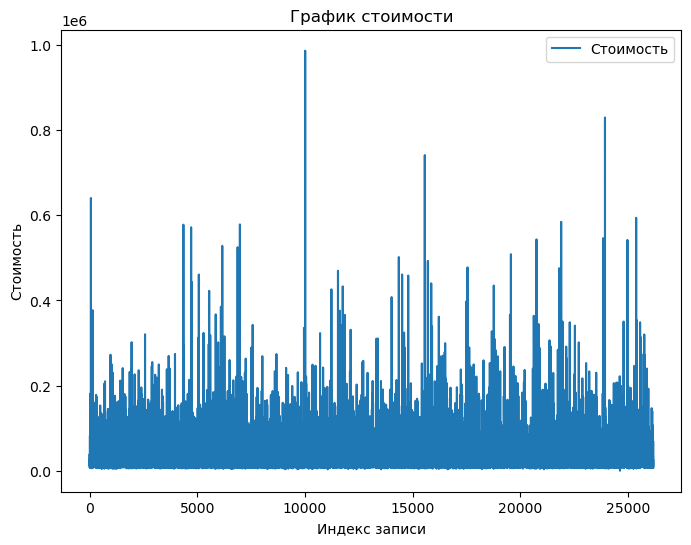

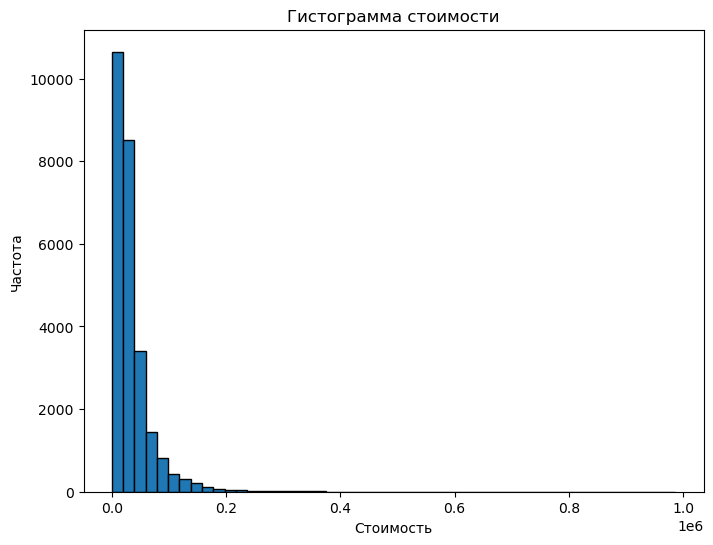

In [33]:
plt.figure(figsize=(8, 6)) # Устанавливаем размер графика
plt.plot(train_df['Стоимость'], label='Стоимость')
plt.xlabel('Индекс записи')
plt.ylabel('Стоимость')
plt.title('График стоимости')
plt.legend()
plt.show()
# Строим гистограмму с интервалами
plt.figure(figsize=(8, 6))
plt.hist(train_df['Стоимость'], bins=50, edgecolor='black') # bins=10 - количество интервалов
plt.xlabel('Стоимость')
plt.ylabel('Частота')
plt.title('Гистограмма стоимости')
plt.show()


### Useless analysis code cell )

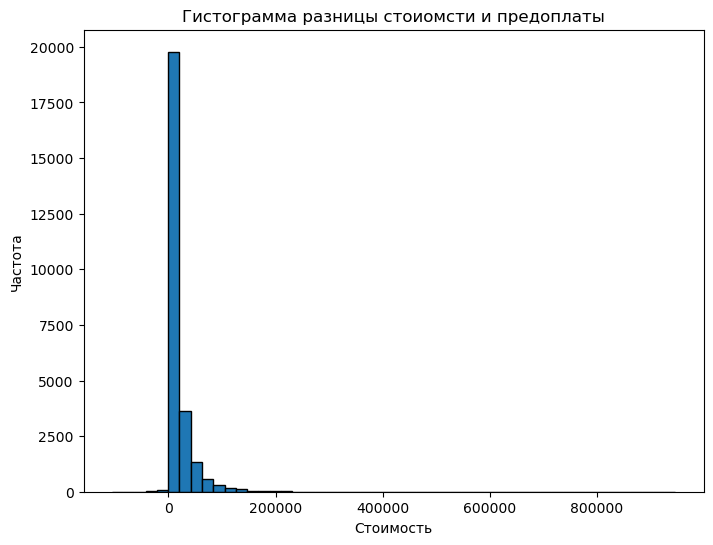

In [34]:
plt.figure(figsize=(8, 6))
plt.hist(train_df['Стоимость'] - train_df['Внесена предоплата'], bins=50, edgecolor='black') # bins=10 - количество интервалов
plt.xlabel('Стоимость')
plt.ylabel('Частота')
plt.title('Гистограмма разницы стоиомсти и предоплаты')
plt.show()